# Quelques références 


*   Généralités sur le perceptron :
> *   Introduction au Machine Learning (Chloé-Agathe Azencott) - Chap 7
*   Algèbre linéaire 
> * [Linear Algebra Review and Reference - Zico Kolter](http://www.cs.cmu.edu/~zkolter/course/linalg/linalg_notes.pdf )
* Numpy efficace 
> * [intro Numpy - S. Raschka](https://sebastianraschka.com/pdf/books/dlb/appendix_f_numpy-intro.pdf)
> *[Look Ma, no for-loops](https://realpython.com/numpy-array-programming/)
* Pandas \& Matplotlib
> * [Manipulation de données](https://pandas.pydata.org/pandas-docs/stable/10min.html)
> * [Représentation des données et figures](http://matplotlib.org/users/beginner.html)

# Echauffement
Pour illustrer l'intérêt de la vectorisation, nous allons comparer le temps de calcul d'une méthode simple suivant si on l'implémente naîvement ou si on utilise la vectorisation.

Dans un premier temps, on donne un code permettant de mesurer le temps d'exécution d'un segment de code.

In [ ]:
import time 

tic = time.time()

# code dont on cherche à mesuer le temps d'execution

toc = time.time()

print("Temps mesuré: ", toc - tic)

# en pratique, pour une estimation plus robuste, on préférera faire une moyenne sur plusieurs itérations

On va chercher à calculer pour A et B, deux tenseurs d'ordre 3, la quantité suivante : \\
$\sum_i \sum_j \sum_k (A_{ijk} - B_{ijk})^2$ 

1.   Implémenter ce calcul avec une triple boucle dans la fonctione l2_loop
2.   Implémenter ce calcul grâce à la vectorisation dans la fonction l2_vectorise
3.   Comparer les temps de calculs de ces fonctions (on pourra jouer sur les dimensions des tenseurs).



In [ ]:
import timeit
import numpy as np

# dimensions des tenseurs A et B
la=500
lb=1200
lc = 3

# Version naive (avec une triple boucle)
def l2_loop(image1, image2):
    return sum((image1[i,j,k]-image2[i,j,k])**2 for i,j,k in zip(range(image1.shape[0]),range(image1.shape                  [1]),range(image1.shape[2])))


# Version efficace (vectorisation)
def l2_vectorise(image1, image2):
    return 0


# generation aleatoire des deux tenseurs 
image1 = np.random.rand(la,lb,lc)
image2 = np.random.rand(la,lb,lc)

#comparaison des temps de calcul des deux fonctions appliquées sur les deux tenseurs générés


IndentationError: ignored

## Implémentation du perceptron en Python

On va implémenter un Perceptron en suivant une démarche objet similaire à celle utilisée dans scikit-learn.

On donne le squelette de la classe Perceptron.
1.   Implémenter la fonction predict, qui implémente 
$\phi (z)\begin{cases}1 & \text{si } z\geq 0 \\-1 & \text{sinon}\end{cases}$ \\
*indication* $z$ est calculée avec la fonction net_input
2.   Compléter l'implémentation de fit (qui applique la règle du perceptron)

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron.

    Parametres
    ------------
    eta : float
      Learning rate (entre 0.0 et 1.0)
    n_iter : int
      Nombre de passes sur l'ensemble d'apprentissage.
    random_state : int
      Graine pour le générateur de nombres pseudo-aléatoire pour 
      l'initialisation aléatoire des poinds.

    Attributs
    -----------
    w_ : 1d-array
      Poids apres l'apprentissage.
    errors_ : list
      Nombre de predictions erronees a chaque passe (epoch).

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Apprentissage des poids sur les donnees d'apprentissage.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Exemples d'apprentissages (vecteurs), ou n_examples est le nombre 
          d'echantillons et n_features est le nombre de variables (features).
        y : array-like, shape = [n_examples]
          Labels.

        Retourne
        -------
        self : object

        """
        #initiatlisation aléatoire des poids w
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = [] # dans cette liste, on stocke le nombre d'erreurs commises à chaque itération 

        # A compléter 

        return self

    def net_input(self, X):
        """Calcul de la sortie du reseau"""
        # cette fonction permet de calculer le produit scalaire de w et de chaque exemple dans X
        #la terminologie est un peu trompeuse ici (mais on verra pourquoi après)
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Classes predites par le reseau (avec les poids courants)"""
        return  # A complementer 


# Apprentissage sur la base Iris

Pour tester la classe implémentée précédemment, on va charger le jeu de données Iris (en se restreignant à deux classes et deux variables).

Le code pour charger et afficher ces données est fourni ici.

1.   Au vue de la Figure affichée, peut-on espérer que la règle du perceptron converge ?
2.   Créer un objet de type Perceptron et appliquer la fonction fit. Pour vérifier que l'apprentissage a convergé (en traçant le nombre d'erreurs commises à chaque itération). on pourra jouer sur les hyperparamètres (learning rate et nombre d'itérations max).
3.   on fournit le code pour afficher la frontière de décision d'un classifieur entraîné. Appliquer le à votre perceptron. La frontière de décision semble-t-elle correcte ?
*Remarque * le code plot_decision_regions applique la fonction predict de la classe sur une grille suffisament fine. (on comprend avec ce code, l'intérêt d'utiliser des objets avec des signatures similaires pour les classifieurs)


In [ ]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


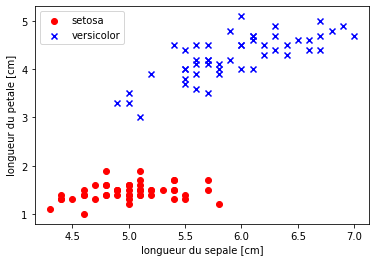

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# selectionn de setosa et versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extraction de la longueur du sepale length et de la longueur du petale
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('longueur du sepale [cm]')
plt.ylabel('longueur du petale [cm]')
plt.legend(loc='upper left')

plt.show()

In [ ]:
# creation de l'objet Perceptron
# apprentissage sur les donnes iris
# figure erreurs vs iterations


In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [ ]:
# affichage de la frontiere de decision apprise

# ADALINE

On va implémenter cette fois un Adaline de la même façon.

On donne le squelette de la classe AdalineGD.
1.   Recopier la fonction predict de la classe Perceptron
2.   Compléter l'implémentation de fit (qui permet applique la règle d'Adaline avec une descente de gradient) 
3.   Créer un objet de type AdalineGD et appliquer la fonction fit. Pour vérifier que l'apprentissage a convergé (en traçant la fonction cout à chaque itération) *Attention* aux choix du learning rate et du nombre d'itérations max.
4.   Appliquer le code de visualtion de la frontière de décision à votre adaline. La frontière de décision semble-t-elle correcte ?

Bonus : 
5. standardiser les donnée et appliquer à nouveau votre Adaline.
6. QUelles modifications apporter pour utiliser un gradient stochastique dans ADALINE ?

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parametres
    ------------
    eta : float
      Learning rate (entre 0.0 et 1.0)
    n_iter : int
      Nombre de passes sur l'ensemble d'apprentissage.
    random_state : int
      Graine pour le générateur de nombres pseudo-aléatoire pour 
      l'initialisation aléatoire des poinds.


    Attributs
    -----------
    w_ : 1d-array
      Poids apres l'apprentissage.
    cost_ : list
      Valeur de la fonction cout a chaque passe (epoch).

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Apprentissage des poids sur les donnees d'apprentissage.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Exemples d'apprentissages (vecteurs), ou n_examples est le nombre 
          d'echantillons et n_features est le nombre de variables (features).
        y : array-like, shape = [n_examples]
          Labels.

        Retourne
        -------
        self : object

        """

        #initialisation des poids aléatoires 
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = [] # dans cette liste, on stocke la valeur de la fonction cout

        # a completer 


        return self


    def net_input(self, X):        
        """Calcul de la sortie du reseau"""
        # cette fonction permet de calculer le produit scalaire de w et de chaque exemple dans X
        #la terminologie est un peu trompeuse ici (mais on verra pourquoi après)
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Calcul d'une fonction d'activation linéaire (identité)"""
        return X

    def predict(self, X):
        """Classes predites par le reseau (avec les poids courants)"""
        return # a implementer (copié-collé de la classe Perceptron)

In [ ]:
# creation de l'objet AdalineGD
# apprentissage sur les donnes iris
# figure erreurs vs iterations
# affichage de la frontiere de decision apprise

In [ ]:
# standardiser les données 
# creation de l'objet AdalineGD
# apprentissage sur les donnes iris
# figure erreurs vs iterations
# affichage de la frontiere de decision apprise